In [2]:
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import datasets
from sklearn import tree


In [5]:
purchaseData=pd.read_csv("Purchase_Logistic.csv")
purchaseData

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
X=purchaseData.iloc[:,2:4]
Y=purchaseData.iloc[:,4]



In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier(random_state=0,max_depth=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

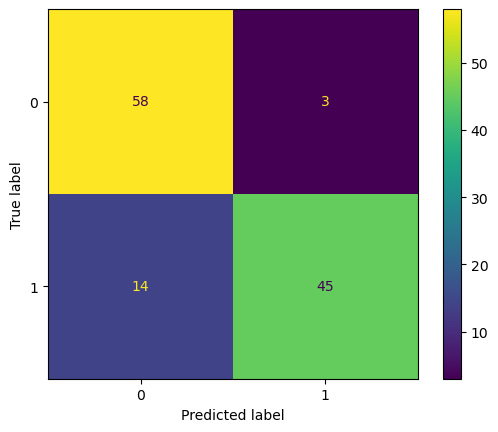

In [25]:
cnf_matrix=metrics.confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(cnf_matrix,display_labels=None).plot()

In [26]:
accuracy=metrics.accuracy_score(y_pred,y_test)
print("The Accuracy Score is ",accuracy*100, "%")

The Accuracy Score is  85.83333333333333 %


|--- Age <= 42.50
|   |--- EstimatedSalary <= 89500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- class: 0
|   |--- EstimatedSalary >  89500.00
|   |   |--- Age <= 27.50
|   |   |   |--- class: 0
|   |   |--- Age >  27.50
|   |   |   |--- class: 1
|--- Age >  42.50
|   |--- Age <= 46.50
|   |   |--- Age <= 45.50
|   |   |   |--- class: 1
|   |   |--- Age >  45.50
|   |   |   |--- class: 0
|   |--- Age >  46.50
|   |   |--- EstimatedSalary <= 41500.00
|   |   |   |--- class: 1
|   |   |--- EstimatedSalary >  41500.00
|   |   |   |--- class: 1



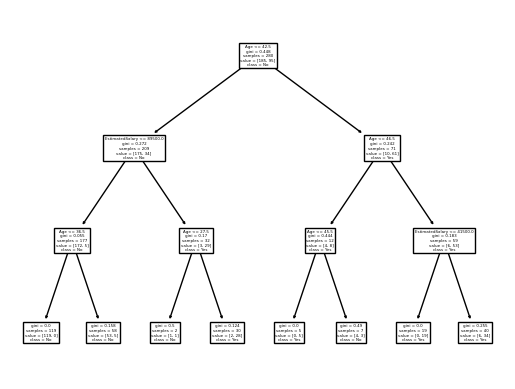

In [20]:
decplot=plot_tree(decision_tree=clf,feature_names=['Age','EstimatedSalary'],class_names=['No', 'Yes'])
text_representation=tree.export_text(clf,feature_names=['Age','EstimatedSalary'])
print(text_representation)

In [1]:
import pandas as pd

# Load the dataset

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Remove the specified attributes
attributes_to_remove = ['MonthlyCharges', 'OnlineSecurity', 'StreamingTV', 'InternetService', 'Partner']
modified_data = data.drop(attributes_to_remove, axis=1)

# Save the modified dataset
modified_data.to_csv("modified_telco_churn_dataset.csv", index=False)

print("Modified dataset saved successfully.")


Modified dataset saved successfully.


In [7]:
# Handle missing values
# Example: Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
# Example: One-hot encoding
data_encoded = pd.get_dummies(data)

# Perform feature selection
# Example: SelectKBest for selecting top k features
from sklearn.feature_selection import SelectKBest, chi2

X = data_encoded.drop(["Churn"], axis=1)
y = data_encoded['Churn']

selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

# Optionally, print selected features
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)


KeyError: "['Churn'] not found in axis"

In [4]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [5]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Customer Churn Prediction") \
    .getOrCreate()

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [3]:





# Convert pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(data_encoded)

# Create feature vector
feature_cols = [col for col in data_encoded.columns if col != 'Churn']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
spark_df = assembler.transform(spark_df)

# Split the data into train and test sets
(train_data, test_data) = spark_df.randomSplit([0.8, 0.2], seed=42)

# Build the decision tree model
dt = DecisionTreeClassifier(labelCol='Churn', featuresCol='features')
model = dt.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate model performance
evaluator = BinaryClassificationEvaluator(labelCol='Churn')
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Stop SparkSession
spark.stop()


PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [6]:
X = data_encoded.drop('Churn')

KeyError: "['Churn'] not found in axis"

In [8]:
data_encoded

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7039,0,72,103.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7040,0,11,29.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,4,74.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# PySpark: Spark's API for Python.
!pip install pyspark

In [10]:
from pyspark.sql import SparkSession

import pyspark.sql.functions as F


In [13]:
#create spark session
spark = SparkSession.builder.getOrCreate()

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.